In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
!pip install face-alignment

  Created wheel for face-alignment: filename=face_alignment-1.3.4-py2.py3-none-any.whl size=27862 sha256=42588d92820fb818140380098a142a7fd0770452debd4392f57fa39854bf4552
  Stored in directory: /root/.cache/pip/wheels/73/f8/8f/617fca0e22aa1dc6b5fbfad78b07fa7626707b49167eea901c
Successfully built face-alignment


In [ ]:
import os, shutil, numpy as np, cv2,zipfile
import subprocess
from google.colab import files
from IPython.display import Audio
import librosa
import matplotlib.pyplot as plt 
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras.layers import Input, Dropout
from tensorflow.keras.optimizers import Adam,SGD
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras import layers 
import face_alignment, copy

In [ ]:
!unzip './drive/My Drive/audio-video.zip'

Archive:  ./drive/My Drive/audio-video.zip
   creating: audio-video/
 extracting: audio-video/Video_Speech_Actor_01.zip  
 extracting: audio-video/Video_Speech_Actor_02.zip  
 extracting: audio-video/Video_Speech_Actor_03.zip  
 extracting: audio-video/Video_Speech_Actor_04.zip  
 extracting: audio-video/Video_Speech_Actor_05.zip  
 extracting: audio-video/Video_Speech_Actor_06.zip  
 extracting: audio-video/Video_Speech_Actor_07.zip  
 extracting: audio-video/Video_Speech_Actor_08.zip  
 extracting: audio-video/Video_Speech_Actor_09.zip  
 extracting: audio-video/Video_Speech_Actor_10.zip  
 extracting: audio-video/Video_Speech_Actor_11.zip  
 extracting: audio-video/Video_Speech_Actor_12.zip  
 extracting: audio-video/Video_Speech_Actor_13.zip  
 extracting: audio-video/Video_Speech_Actor_14.zip  
 extracting: audio-video/Video_Speech_Actor_15.zip  
 extracting: audio-video/Video_Speech_Actor_16.zip  
 extracting: audio-video/Video_Speech_Actor_17.zip  
 extracting: audio-video/Video

In [ ]:
u=files.upload()

Saving try.JPG to try.JPG


In [ ]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, flip_input=False)

Downloading: "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" to /root/.cache/torch/hub/checkpoints/s3fd-619a316812.pth


  0%|          | 0.00/85.7M [00:00<?, ?B/s]

Downloading: "https://www.adrianbulat.com/downloads/python-fan/2DFAN4-cd938726ad.zip" to /root/.cache/torch/hub/checkpoints/2DFAN4-cd938726ad.zip


  0%|          | 0.00/91.9M [00:00<?, ?B/s]

In [ ]:
def face(img):
    input=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    preds = fa.get_landmarks(input)
    pt=preds[0]
    wdth = int(pt[30][1]-pt[27][1])
    y11= int(min(pt[17][1],pt[22][1],pt[19][1],pt[24][1],pt[21][1], pt[25][1]) - wdth *0.7)
    y12=  int(max(pt[6][1],pt[7][1],pt[8][1],pt[9][1],pt[10][1],pt[11][1]) + wdth *0.4)
    x11= int(min(pt[0][0],pt[17][0],pt[30][0]) - wdth *0.4)
    x12= int(max(pt[26][0],pt[16][0],pt[30][0]) + wdth *0.3)

    return img[y11:y12,x11:x12]

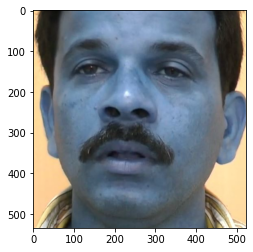

In [ ]:
plt.imshow(face(cv2.imread('try.JPG')))

In [ ]:
for i in range(1,9):
    os.mkdir(str(i))
    #shutil.rmtree(str(i))
    #os.mkdir(str(i)+'_'+'1')

In [ ]:
ls

1/    2/    3/    4/    5/    6/    7/    8/    audio-video/  sample_data/
1_1/  2_1/  3_1/  4_1/  5_1/  6_1/  7_1/  8_1/  drive/        try.JPG


I was completing this but time got over

In [ ]:
arr1,arr2,arr3=[],[],[]
label1,label2,label3=[],[],[]

for act in range(1,21):
    #'audio-video/Video_Speech_'+'Actor_'+str(act).zfill(2)+".zip"
    
    with zipfile.ZipFile('audio-video/Video_Speech_'+'Actor_'+str(act).zfill(2)+".zip", 'r') as zip_ref:
        zip_ref.extractall('zipfiles')
    
    l=os.listdir('zipfiles/Actor_'+str(act).zfill(2)+'/')
    for ff in range(len(l)):
        #print('Actor_'+str(act).zfill(2)+'/'+l[ff])
        
        doc_name=l[ff]
        n=doc_name.split('.mp4')
        w=int(n[0].split('-')[0])#01 = full-AV, 02 = video-only, 03 = audio-only
        lab=int(n[0].split('-')[2])#01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised
        
        arr=[]
        video = cv2.VideoCapture('zipfiles/Actor_'+str(act).zfill(2)+'/'+l[ff])
        while(True): 
            ret, frame = video.read() 
            if ret == True:  
                #input=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
                img=face(frame)
                frame=cv2.resize(img,(112,112))
                #feat=frame.reshape(1,224,224,3)
                arr.append(frame)
            else:
                print("done",'zipfiles/Actor_'+str(act).zfill(2)+'/'+l[ff])
                video.release()
                cv2.destroyAllWindows()
                break
        #height, width, _ = frame.shape

        out = cv2.VideoWriter(os.path.join(str(lab),'Actor_'+str(act).zfill(2)+'_'+n[0]+'.avi'),cv2.VideoWriter_fourcc('M','J','P','G'), 30, (112,112))
        for image in arr:
            out.write(image)
        out.release()

done zipfiles/Actor_01/02-01-03-01-02-01-01.mp4
done zipfiles/Actor_01/02-01-05-01-01-02-01.mp4
done zipfiles/Actor_01/02-01-06-01-01-02-01.mp4
done zipfiles/Actor_01/02-01-07-02-02-01-01.mp4
done zipfiles/Actor_01/01-01-03-01-01-02-01.mp4
done zipfiles/Actor_01/02-01-07-01-01-01-01.mp4
done zipfiles/Actor_01/01-01-08-01-02-02-01.mp4
done zipfiles/Actor_01/02-01-06-01-02-01-01.mp4
done zipfiles/Actor_01/02-01-05-01-02-01-01.mp4
done zipfiles/Actor_01/01-01-05-01-02-01-01.mp4
done zipfiles/Actor_01/01-01-07-02-02-01-01.mp4
done zipfiles/Actor_01/01-01-06-02-02-02-01.mp4
done zipfiles/Actor_01/01-01-04-01-02-01-01.mp4
done zipfiles/Actor_01/01-01-07-01-02-01-01.mp4
done zipfiles/Actor_01/01-01-05-01-01-01-01.mp4
done zipfiles/Actor_01/01-01-02-01-02-02-01.mp4
done zipfiles/Actor_01/01-01-04-02-01-01-01.mp4
done zipfiles/Actor_01/02-01-04-02-01-01-01.mp4
done zipfiles/Actor_01/01-01-02-01-02-01-01.mp4
done zipfiles/Actor_01/01-01-05-02-01-01-01.mp4
done zipfiles/Actor_01/02-01-01-01-01-01

In [ ]:
#height, width, _ = frame.shape
#video_wr = cv2.VideoWriter(str(lab)+'/Actor_'+str(act).zfill(2)+'/'+l[ff], 0, 1, (112,112))

In [ ]:
# out = cv2.VideoWriter(os.path.join(str(lab),'Actor_'+str(act).zfill(2)+'_'+n[0]+'.avi'),cv2.VideoWriter_fourcc('M','J','P','G'), 30, (112,112))
# for image in arr:
#     out.write(image)
# out.release()

In [ ]:
# files.download('outpy.avi')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

video_path,feature_path <br>
absolute_path_video1.mp4,absolute_path_of_video1_features.npy
absolute_path_video2.webm,absolute_path_of_video2_features.npy

In [ ]:
csv_arr=[['video_path','feature_path']]
for i in range(1,9):
    for j in os.listdir(str(i)):
        csv_arr.append([str(i)+'/'+j,str(i)+'_'+'1/'+j.split('.avi')[0]+'.npy'])

In [ ]:
str(i)+'_'+'1/'+j.split('.avi')[0]+'.npy'

'8_1/Actor_02_01-01-08-02-02-02-02.npy'

In [ ]:
csv_arr

[['video_path', 'feature_path'],
 ['1/Actor_01_01-01-01-01-02-02-01.avi',
  '1_1/Actor_01_01-01-01-01-02-02-01.npy'],
 ['1/Actor_02_02-01-01-01-02-02-02.avi',
  '1_1/Actor_02_02-01-01-01-02-02-02.npy'],
 ['1/Actor_01_01-01-01-01-01-02-01.avi',
  '1_1/Actor_01_01-01-01-01-01-02-01.npy'],
 ['1/Actor_01_02-01-01-01-02-02-01.avi',
  '1_1/Actor_01_02-01-01-01-02-02-01.npy'],
 ['1/Actor_02_01-01-01-01-02-02-02.avi',
  '1_1/Actor_02_01-01-01-01-02-02-02.npy'],
 ['1/Actor_02_02-01-01-01-01-02-02.avi',
  '1_1/Actor_02_02-01-01-01-01-02-02.npy'],
 ['1/Actor_02_02-01-01-01-02-01-02.avi',
  '1_1/Actor_02_02-01-01-01-02-01-02.npy'],
 ['1/Actor_01_02-01-01-01-01-01-01.avi',
  '1_1/Actor_01_02-01-01-01-01-01-01.npy'],
 ['1/Actor_02_02-01-01-01-01-01-02.avi',
  '1_1/Actor_02_02-01-01-01-01-01-02.npy'],
 ['1/Actor_01_02-01-01-01-01-02-01.avi',
  '1_1/Actor_01_02-01-01-01-01-02-01.npy'],
 ['1/Actor_01_01-01-01-01-02-01-01.avi',
  '1_1/Actor_01_01-01-01-01-02-01-01.npy'],
 ['1/Actor_01_01-01-01-01-01-01-

In [ ]:
import csv
# open the file in the write mode
f = open('csv_file.csv', 'w')
# create the csv writer
writer = csv.writer(f)
# write a row to the csv file
writer.writerows(csv_arr)
# close the file
f.close()

In [ ]:
u=files.upload()

Saving video_feature_extractor-master.zip to video_feature_extractor-master.zip


In [ ]:
!unzip video_feature_extractor-master.zip

In [ ]:
ls

1/    6_1/          outpy.avi
1_1/  7/            preprocessing.py
2/    7_1/          random_sequence_shuffler.py
2_1/  8/            README.md
3/    8_1/          sample_data/
3_1/  audio-video/  try.JPG
4/    csv_file.csv  videocnn/
4_1/  drive/        video_feature_extractor-master/
5/    extract.py    video_feature_extractor-master.zip
5_1/  LICENSE       video_loader.py
6/    model.py      zipfiles/


In [ ]:
# for i in os.listdir('video_feature_extractor-master/'):
#     shutil.move('video_feature_extractor-master/'+i,i)

In [ ]:
# os.remove('video_feature_extractor-master.zip')

In [ ]:
!pip install ffmpeg

  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=c5f79ae4ee12c901216c424620271f0480f9d9fa8e1e69ea40943a4eaee1f3d4
  Stored in directory: /root/.cache/pip/wheels/64/80/6e/caa3e16deb0267c3cbfd36862058a724144e19fdb9eb03af0f
Successfully built ffmpeg


In [ ]:
!sudo apt install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [ ]:
!mkdir model
!cd model
!wget https://www.rocq.inria.fr/cluster-willow/amiech/howto100m/models/resnext101.pth

--2021-08-15 12:54:18--  https://www.rocq.inria.fr/cluster-willow/amiech/howto100m/models/resnext101.pth
Resolving www.rocq.inria.fr (www.rocq.inria.fr)... 128.93.96.7
Connecting to www.rocq.inria.fr (www.rocq.inria.fr)|128.93.96.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 194020261 (185M)
Saving to: ‘resnext101.pth’

resnext101.pth      100%[===================>] 185.03M  1.76MB/s    in 45s     

2021-08-15 12:55:05 (4.10 MB/s) - ‘resnext101.pth’ saved [194020261/194020261]



In [ ]:
#shutil.move('resnext101.pth','model/resnext101.pth')
os.listdir('model')

['resnext101.pth']

In [ ]:
ls

1/    4_1/  8/            model/                       resnext101.pth
1_1/  5/    8_1/          model.py                     sample_data/
2/    5_1/  audio-video/  outpy.avi                    try.JPG
2_1/  6/    csv_file.csv  preprocessing.py             videocnn/
3/    6_1/  drive/        __pycache__/                 video_loader.py
3_1/  7/    extract.py    random_sequence_shuffler.py  zipfiles/
4/    7_1/  LICENSE       README.md


In [ ]:
os.listdir('1')[0]

In [ ]:
files.download('1/'+os.listdir('1')[2])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!python extract.py --csv=csv_file.csv --type=3d --batch_size=64 --num_decoding_thread=1

In [ ]:
os.listdir('1_1')

[]